Task 1: Exploratory Data Analysis (EDA)

In this section, we will perform exploratory data analysis (EDA) to understand the dataset better, clean it, and visualize key trends.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Check the first few rows to understand the data structure
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

After loading the data, let's check for any missing values and clean the data.

In [3]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Remove duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Now, let's explore some statistics and visualizations to gain insights from the data.

                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                   

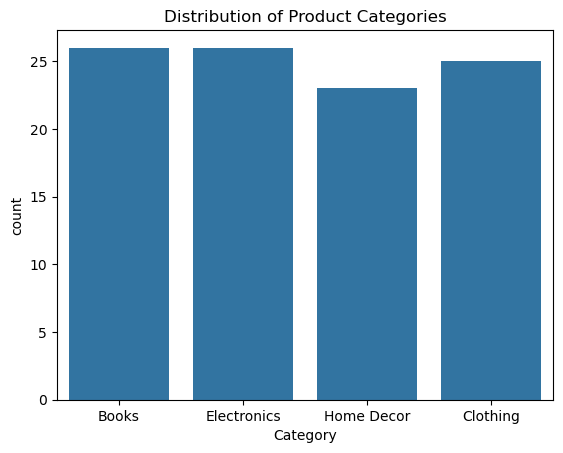

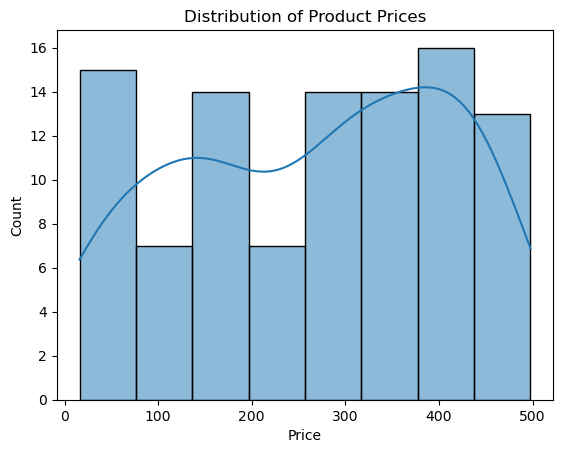

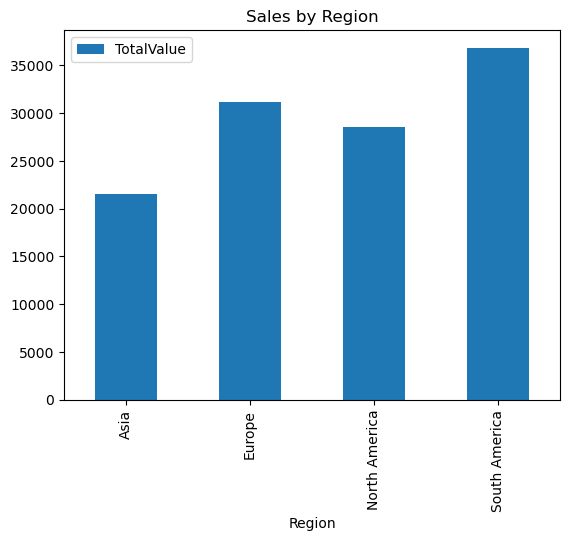

In [4]:
# Summary statistics for numerical columns
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Distribution of product categories
sns.countplot(data=products, x='Category')
plt.title("Distribution of Product Categories")
plt.show()

# Distribution of price in Products dataset
sns.histplot(products['Price'], kde=True)
plt.title("Distribution of Product Prices")
plt.show()

# Total sales by region
sales_by_region = transactions.groupby(customers['Region']).agg({'TotalValue': 'sum'})
sales_by_region.plot(kind='bar', title="Sales by Region")
plt.show()


Task 2: Lookalike Model

In this section, we will build a lookalike model that recommends similar customers based on transaction history and customer profile.

In [6]:
# Aggregate customer transaction data
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()

customer_transactions.rename(columns={'TransactionID': 'NumberOfPurchases'}, inplace=True)

# Merge with customer information
customer_profile = pd.merge(customers, customer_transactions, on='CustomerID', how='left')
print(customer_profile.head())


  CustomerID        CustomerName         Region SignupDate  TotalValue  \
0      C0001    Lawrence Carroll  South America 2022-07-10     3354.52   
1      C0002      Elizabeth Lutz           Asia 2022-02-13     1862.74   
2      C0003      Michael Rivera  South America 2024-03-07     2725.38   
3      C0004  Kathleen Rodriguez  South America 2022-10-09     5354.88   
4      C0005         Laura Weber           Asia 2022-08-15     2034.24   

   NumberOfPurchases  
0                5.0  
1                4.0  
2                4.0  
3                8.0  
4                3.0  


We will now calculate similarity between customers using cosine similarity.

In [9]:
# Fill missing values with the mean of the column
features = customer_profile[['TotalValue', 'NumberOfPurchases']].fillna(features.mean())

# Calculate cosine similarity
similarity_matrix = cosine_similarity(features)

# Print similarity scores for the first customer
print(similarity_matrix[0])


[1.         0.99999978 1.         1.         1.         0.99999985
 0.99999995 0.99999964 0.99999828 0.99999965 0.99999999 0.99999999
 0.99999995 0.99999864 0.99999997 0.99999998 0.99999998 0.9999999
 0.99999921 0.99999992 1.         0.99999998 0.99999995 0.9999999
 0.99999947 0.99999993 1.         0.99999995 0.99999972 0.99999989
 0.99999987 0.9999956  0.99998171 0.99999989 1.         0.99999999
 0.99999995 0.99999993 1.         0.99999973 0.99999994 0.99999997
 0.99999933 0.99999984 0.99999995 0.99999997 0.99999955 0.99999998
 0.99999807 0.99999987 0.99999997 0.99999999 0.99999993 0.99999988
 0.99999997 1.         0.99999999 0.99999947 0.99999994 0.99994328
 1.         0.99999994 1.         0.99999997 0.99999998 0.99999975
 1.         0.99999999 0.99999997 0.99999998 0.99999979 0.99999998
 1.         0.99999987 1.         0.99999979 0.99999781 0.99999988
 0.99999985 0.99999988 0.99999998 0.99999984 0.99999495 0.99999986
 0.99999994 0.99999995 0.99999991 0.99999964 0.99999975 0.999999

Next, let's find the top 3 similar customers for each of the first 20 customers.

In [10]:
def get_top_similar(customers, similarity_matrix, top_n=3):
    recommendations = {}
    
    for i, customer in enumerate(customers['CustomerID']):
        similar_scores = similarity_matrix[i]
        similar_customers = [(customers['CustomerID'][j], similar_scores[j]) for j in range(len(customers)) if i != j]
        similar_customers.sort(key=lambda x: x[1], reverse=True)
        recommendations[customer] = similar_customers[:top_n]
    
    return recommendations

# Get the top 3 similar customers for each of the first 20 customers
lookalike_recommendations = get_top_similar(customer_profile, similarity_matrix)


Save the recommendations in a CSV file

In [11]:
lookalike_data = []
for customer_id, similar_customers in lookalike_recommendations.items():
    for similar_customer, score in similar_customers:
        lookalike_data.append([customer_id, similar_customer, score])

lookalike_df = pd.DataFrame(lookalike_data, columns=['CustomerID', 'LookalikeCustomerID', 'SimilarityScore'])
lookalike_df.to_csv('Lookalike.csv', index=False)


Task 3: Customer Segmentation / Clustering

In this section, we will perform customer segmentation using clustering techniques.

In [12]:
# Merge customer data with their transaction summary
segmentation_data = pd.merge(customers, customer_transactions, on='CustomerID', how='left')


Now, let's perform clustering using KMeans and find the optimal number of clusters using DB Index.

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np
import os

# Set OMP_NUM_THREADS to avoid warnings related to KMeans and memory leak on Windows
os.environ['OMP_NUM_THREADS'] = '1'

# Assuming `segmentation_data` is your DataFrame that includes 'TotalValue' and 'NumberOfPurchases'
# You can load your dataset like this:
# segmentation_data = pd.read_csv('your_data.csv')  # Modify as per your data path

# Example: Loading the segmentation_data if it's already available
# segmentation_data = pd.read_csv('path_to_your_data.csv')

# Select relevant features for clustering
clustering_features = segmentation_data[['TotalValue', 'NumberOfPurchases']]

# Check for missing values and handle them
# Option 1: Fill missing values with the mean of the column
clustering_features = clustering_features.fillna(clustering_features.mean())

# Option 2: Alternatively, drop rows with missing values (if acceptable)
# clustering_features = clustering_features.dropna()

# Find the optimal number of clusters (e.g., 2-10 clusters)
best_db_index = float('inf')
best_k = 0

# Iterate over the possible number of clusters (2 to 10)
for k in range(2, 11):  # Try from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features)
    db_index = davies_bouldin_score(clustering_features, kmeans.labels_)
    
    if db_index < best_db_index:
        best_db_index = db_index
        best_k = k

# Perform clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(clustering_features)

# Assign the cluster labels to the data
segmentation_data['Cluster'] = kmeans.labels_

# Calculate DB Index for the best model
print(f'Best number of clusters: {best_k}')
print(f'Davies-Bouldin Index: {best_db_index}')

# Optional: Show the first few rows of the clustered data
print(segmentation_data.head())


C:\Users\yetin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yetin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yetin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yetin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Best number of clusters: 8
Davies-Bouldin Index: 0.4291912801244034
  CustomerID        CustomerName         Region SignupDate  TotalValue  \
0      C0001    Lawrence Carroll  South America 2022-07-10     3354.52   
1      C0002      Elizabeth Lutz           Asia 2022-02-13     1862.74   
2      C0003      Michael Rivera  South America 2024-03-07     2725.38   
3      C0004  Kathleen Rodriguez  South America 2022-10-09     5354.88   
4      C0005         Laura Weber           Asia 2022-08-15     2034.24   

   NumberOfPurchases  Cluster  
0                5.0        1  
1                4.0        5  
2                4.0        1  
3                8.0        0  
4                3.0        5  


C:\Users\yetin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yetin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yetin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yetin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

visulize the clusters

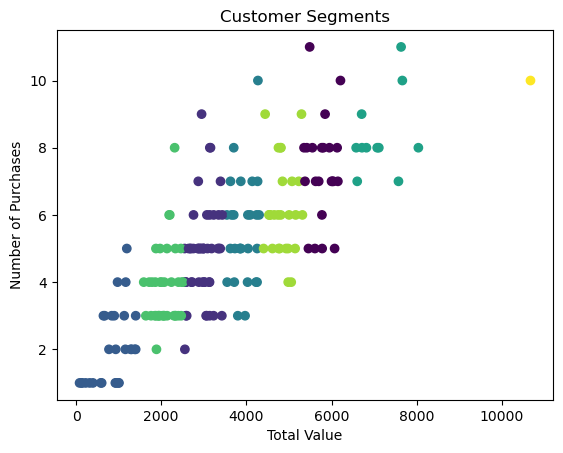

In [16]:
plt.scatter(segmentation_data['TotalValue'], segmentation_data['NumberOfPurchases'], c=segmentation_data['Cluster'])
plt.title("Customer Segments")
plt.xlabel("Total Value")
plt.ylabel("Number of Purchases")
plt.show()
